In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px  #Criação de graficos dinâmnicos
import plotly.graph_objects as go #Para criação e concatenização de graficos
from sklearn.preprocessing import StandardScaler # para relizar a padronização dos dados
from sklearn.cluster import KMeans

In [ ]:
#Abrindo o arquivo de dados
base_iris = pd.read_csv('base_iris.csv', sep = ';')


In [ ]:
base_iris.head()

,sepal length,sepal width,petal length,petal width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
base_iris.shape

(150, 5)

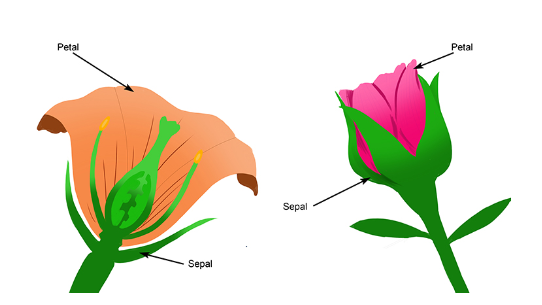

In [ ]:
# Verifica as classes das flores
base_iris['Class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Realizando o agrupamento pela pétalas

In [ ]:
# criando variável X com as colunas petal length	petal width
X_petala = base_iris.iloc[:,[2,3]].values
X_petala[:10]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1]])

# Normalizando os dados
Como os dados estão em uma escala muito diferente, precisamos normalizar os dados colocando no mesmo padrão e na mesma escala. Como o Kmeans realiza os calculos baseado na distancia, devemos padronizar os dados afim de que um atributo não seja considerado mais importanet do que o outro.

In [ ]:
normalizar_dados = StandardScaler()
X_petala = normalizar_dados.fit_transform(X_petala)
X_petala[:10]

array([[-1.3412724 , -1.31297673],
       [-1.3412724 , -1.31297673],
       [-1.39813811, -1.31297673],
       [-1.2844067 , -1.31297673],
       [-1.3412724 , -1.31297673],
       [-1.17067529, -1.05003079],
       [-1.3412724 , -1.18150376],
       [-1.2844067 , -1.31297673],
       [-1.3412724 , -1.31297673],
       [-1.2844067 , -1.4444497 ]])

# Calculando o número de Cluster
Para calcular o número de cluster vamos utilizar o metodo do cotovelo

WCSS é a soma da distância quadrada entre cada ponto e o centróide em um cluster

In [ ]:
wcss_petala = [] # Cria uma lista vazia
for i in range(1,11):
  kmeans_petala = KMeans(n_clusters=i, random_state=0) # Executa o kmeans para todos os clusters e random_state = 0  para fixar e obter os mesmos resultados
  kmeans_petala.fit(X_petala) # realiza o treinamento
  wcss_petala.append(kmeans_petala.inertia_) # adiciona na lista os valores de wcss


In [1]:
#Visualizando os valores de wcss
for i in range(len(wcss_petala)):
  print('Cluster:', i ,'- Valor do wcss:', wcss_petala[i] )


NameError: name 'wcss_petala' is not defined

# Criando gráfico para melhor visualização

In [ ]:
grafico_cotovelo_petala = px.line( x= range(1,11), y=wcss_petala)
grafico_cotovelo_petala.show()

In [ ]:
kmeans_petala = KMeans(n_clusters=3, random_state=0)
label_cluster_petala = kmeans_petala.fit_predict(X_petala)

In [ ]:
#Verifica a classificação dos clusters
label_cluster_petala

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
centroides_petala = kmeans_petala.cluster_centers_
centroides_petala

array([[-1.30487835, -1.25512862],
       [ 1.02813193,  1.12749028],
       [ 0.30564587,  0.16609419]])

# Gráfico de agrupamento das características do tamanho e comprimento das pétalas

In [ ]:
grafico_petala = px.scatter(x = X_petala[:,0], y = X_petala[:,1], color= label_cluster_petala)
grafico_centroide_petala = px.scatter(x = centroides_petala[:,0], y = centroides_petala[:,1], size = [7,7,7])
grafico
grafico_final_petala = go.Figure(data = grafico_petala.data + grafico_centroide_petala.data)
grafico_final_petala.show()


# Realizando o agrupamento com dados da sépala

In [ ]:
# Realizando o agrupamento sepala
X_sepala = base_iris.iloc[:,[0,1 ]].values
X_sepala[:10]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1]])

In [ ]:
#calcular o wcss
wcss_sepala = [] # Cria uma lista vazia
for i in range(1,11):
  kmeans_sepala = KMeans(n_clusters=i, random_state=0) # Executa o kmeans para todos os clusters e random_state = 0  para fixar e obter os mesmos resultados
  kmeans_sepala.fit(X_sepala) # realiza o treinamento
  wcss_sepala.append(kmeans_sepala.inertia_) # adiciona na lista os valores de wcss

In [ ]:
#Visualizando os valores de wcss
for i in range(len(wcss_sepala)):
  print('Cluster:', i ,'- Valor do wcss:', wcss_sepala[i] )


Cluster: 0 - Valor do wcss: 130.18093333333334
Cluster: 1 - Valor do wcss: 57.982406042078765
Cluster: 2 - Valor do wcss: 37.12370212765957
Cluster: 3 - Valor do wcss: 27.948333333333338
Cluster: 4 - Valor do wcss: 20.94968664636183
Cluster: 5 - Valor do wcss: 17.23869523809524
Cluster: 6 - Valor do wcss: 14.631909607059608
Cluster: 7 - Valor do wcss: 12.764068676332741
Cluster: 8 - Valor do wcss: 11.161008019758023
Cluster: 9 - Valor do wcss: 9.65434920634921


In [ ]:
grafico_cotovelo = px.line( x= range(1,11), y=wcss_sepala)
grafico_cotovelo.show()

In [ ]:
#Executando o algoritmo k-means
kmeans_sepala = KMeans(n_clusters=3, random_state=0)
label_cluster_sepala = kmeans_sepala.fit_predict(X_sepala)

In [ ]:
#Verifica a classificação dos clusters
label_cluster_sepala

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [ ]:
centroides_sepala = kmeans_sepala.cluster_centers_
centroides_sepala

array([[5.006     , 3.418     ],
       [6.81276596, 3.07446809],
       [5.77358491, 2.69245283]])

# Gráfico de agrupamento das características do tamanho e comprimento das sépalas

In [ ]:
grafico = px.scatter(x = X_sepala[:,0], y = X_sepala[:,1], color= label_cluster_sepala)
grafico_centroide = px.scatter(x = centroides_sepala[:,0], y = centroides_sepala[:,1], size = [7,7,7])
grafico_final = go.Figure(data = grafico.data + grafico_centroide.data)
grafico_final.show()


# Gráfico de agrupamento das características do tamanho e comprimento das sépalas

In [ ]:
grafico_petala = px.scatter(x = X_petala[:,0], y = X_petala[:,1], color= label_cluster_petala)
grafico_centroide_petala = px.scatter(x = centroides_petala[:,0], y = centroides_petala[:,1], size = [7,7,7])
grafico_final_petala = go.Figure(data = grafico_petala.data + grafico_centroide_petala.data)
grafico_final_petala.show()